#### Modelado con SVM (Support Vector Machine)

Importacion de librerias y archivo 

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [2]:
#leer csv
df = pd.read_csv('defunciones_clean.csv')


Quitar columnas no relevantes

In [3]:
# drop columns no relevantes
df.drop('Departamento_Residencia_Madre', axis=1, inplace=True)
df.drop('Año_Registro', axis=1, inplace=True)
df.drop('Mes_Registro', axis=1, inplace=True)
df.drop('Día_Ocurrencia', axis=1, inplace=True)        # No se considera el día de ocurrencia

df.drop('Departamento_Registro', axis=1, inplace=True)

df.drop('Municipio_Registro', axis=1, inplace=True)
df.drop('Municipio_Ocurrencia', axis=1, inplace=True)          
df.drop('Municipio_Residencia_Madre', axis=1, inplace=True)

Separar en entrenaminto y prueba

In [4]:

X = df.drop("Causa_Defunción", axis=1)
Y = df["Causa_Defunción"]

#dividir el dataset en conjunto de entrenamiento y conjunto de testing
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, Y, test_size=0.5, random_state=100)

df.head()



,Área_Geográfica,Asistencia_Recibida,Año_Ocurrencia,Causa_Defunción,Clase_Parto,Departamento_Ocurrencia,Edad_Madre,Estado_Civil_Madre,Escolaridad_Madre,Mes_Ocurrencia,...,Semanas_Gestacion,Sexo,Sitio_Ocurrencia,Tipo_Atencion,Total_Hijos_Nacidos,Total_Hijos_Nacidos_Muertos,Total_Hijos_Vivos,Via_Parto,Nacionalidad_Madre,Grupo_Etnico_Madre
0,99,6,2009,0,1,7,18.0,2,99,5,...,34.416349,1,2,1,1.269311,2.0,1.0,99,1,4
1,99,1,2009,0,1,13,36.0,2,99,6,...,34.416349,1,9,1,1.269311,3.0,2.0,99,1,4
2,99,2,2009,0,1,2,22.0,2,99,1,...,34.416349,1,2,1,1.269311,3.0,2.0,99,1,4
3,99,2,2009,0,1,5,26.0,2,99,5,...,34.416349,1,2,1,1.269311,0.0,0.0,99,1,4
4,99,2,2009,0,1,7,43.0,2,99,5,...,34.416349,2,2,1,1.269311,10.0,6.0,99,1,4


Se utiiza GridSearchCV para determinar que hiperparámetros son los más óptimos para el respectivo modelo.

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import matplotlib.pyplot as plt

params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'sigmoid', 'poly']
}

svm_dummy = svm.SVC()

# smaller sample size for grid search, since it is an exhaustive process and it takes a lot of time
X_entreno_sample = X_entreno.sample(frac=0.005, random_state=100)
y_entreno_sample = y_entreno.sample(frac=0.005, random_state=100)

svm_grid = GridSearchCV(svm_dummy, params, n_jobs=-1, verbose=2, cv=3)

svm_grid.fit(X_entreno_sample, y_entreno_sample) 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print("Grid search results:")
print("---------------------")
results = svm_grid.cv_results_

print(results)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Grid search results:
---------------------
{'mean_fit_time': array([0.00633534, 0.00700132, 0.00599662, 0.01099928, 0.00499654,
       0.00499996, 0.00433389, 0.01133442, 0.00466871, 0.00466474,
       0.00433207, 0.01033139, 0.00466688, 0.00433318, 0.00499773,
       0.01166685, 0.0039986 , 0.00399907, 0.00366815, 0.01000214,
       0.00466752, 0.00599917, 0.00466657, 0.00933266, 0.00399995,
       0.00466696, 0.00433445, 0.00966811, 0.00400154, 0.00466863,
       0.00433421, 0.01033171, 0.00433286, 0.00466704, 0.00400043,
       0.01133331, 0.00733201, 0.00466665, 0.00366465, 0.01133227,
       0.00433143, 0.01266623, 0.00400146, 0.01033266, 0.0049994 ,
       0.01000492, 0.00399804, 0.01199953, 0.00499821, 0.00933337,
       0.00366513, 0.01066621, 0.00366481, 0.00899903, 0.00500091,
       0.0113349 , 0.00433493, 0.01099912, 0.0036664 , 0.02666783,
       0.00533422, 0.0130012 , 0.00400019, 0.0126702 , 0.00433294,
     

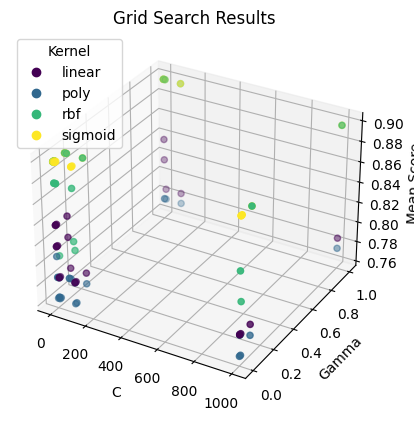

Best parameters set found on development set:
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [19]:
mean_scores = results["mean_test_score"]
params = results["params"]

# Extract parameter values for each parameter
param_C = [param['C'] for param in params]
param_gamma = [param['gamma'] for param in params]
param_kernel = [param['kernel'] for param in params]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Mapping kernel names to integer values
kernel_map = {'linear': 0, 'poly': 1, 'rbf': 2, 'sigmoid': 3}
kernel_colors = [kernel_map[kernel] for kernel in param_kernel]

# Plotting the mean scores with color-coded markers based on kernel
scatter = ax.scatter(param_C, param_gamma, mean_scores, c=kernel_colors, cmap='viridis')

ax.set_xlabel('C')
ax.set_ylabel('Gamma')
ax.set_zlabel('Mean Score')
ax.set_title('Grid Search Results')
ax.legend(handles=scatter.legend_elements()[0], labels=kernel_map.keys(), title='Kernel')

plt.show()

print("Best parameters set found on development set:")
print(svm_grid.best_params_)


* _Debido al gran tamaño del dataset y de la alta complejidad de ejeución del gridsearch, se decidió realizar el gridsearch en una muestra del 0.5% del dataset original._
* _Existen múltiples hiper-parámetros que alcanzan el mismo score, por lo que se decidió escoger los que menos tiempo de ejecución requirieran._

In [16]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Crear el clasificador SVM
clf = svm.SVC(kernel='linear')  # Puedes ajustar el kernel según tus necesidades (lineal, polinómico, RBF, etc.)

# Entrenar el modelo utilizando los datos de entrenamiento
clf.fit(X_entreno, y_entreno)

# Realizar predicciones en el conjunto de prueba
predicciones = clf.predict(X_prueba)

# Calcular el accuracy
accuracy = accuracy_score(y_prueba, predicciones)

# Mostrar el accuracy
print("Accuracy:", accuracy)
print("Recall:", recall_score(y_prueba, predicciones, average='macro'))
print("Precision:", precision_score(y_prueba, predicciones, average='macro'))
print("F1:", f1_score(y_prueba, predicciones, average='macro'))

Accuracy: 0.8936841569545524
Recall: 0.33296842007631583
Precision: 0.3252769522186833
F1: 0.3189507296148259


c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# Se utilizan los hipérparámetros obtenidos en la búsqueda de grilla
clf = svm.SVC(kernel='rbf', C=1, gamma=0.1)  

# Entrenar el modelo utilizando los datos de entrenamiento
clf.fit(X_entreno, y_entreno)

# Realizar predicciones en el conjunto de prueba
predicciones = clf.predict(X_prueba)

# Calcular el accuracy
accuracy = accuracy_score(y_prueba, predicciones)

# Mostrar el accuracy
print("Accuracy:", accuracy)
print("Recall:", recall_score(y_prueba, predicciones, average='macro'))
print("Precision:", precision_score(y_prueba, predicciones, average='macro'))
print("F1:", f1_score(y_prueba, predicciones, average='macro'))


Accuracy: 0.9034556465977912
Recall: 0.3531767597499808
Precision: 0.5205783818222245
F1: 0.3542454185668644


c:\Users\DIEGO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
